# Reading Brick-files

First I set up the packages that I am going to need for the analysis

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.io.fits as fits

In [3]:
import os

Brick files have a standard name `brick-{CHANNEL}-{BRICK_NAME}.fits`.

We are going to set up a function to read these files and give us the HDU lists.

In [4]:
def readBricks(path_in,brick_name):
    hdus = []
    for channel in 'brz':
        filename = 'brick-{}-{}.fits'.format(channel,brick_name)
        hdulist = fits.open(os.path.join(path_in,filename))
        hdus.append(hdulist)
    return hdus

In [5]:
hdus = readBricks('/Users/javiers/fake_qso','qso-osu')

`hdus` is a list containing 3 `HDUList` objects. The `0` list corresponds to the `b` camera, the `1` to the `r`, and the `2` to the `z`. More info here: http://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/PRODNAME/bricks/BRICKNAME/brick-CHANNEL-BRICKNAME.html

* The first hdu contains the fluxes
* The second hdu contains the inverse variance
* The third hdu contains the wavelength grid
* The fourth hdu contains the resolution matrix
* The fifth hdu contains the fibermap in a Table

In [6]:
def plot_smooth(nqso, nresample_b, nresample_r, nresample_z):
    x_b = np.mean(hdus[0][2].data.reshape(-1, nresample_b), axis=1)
    y_b = np.average(hdus[0][0].data[nqso,:].reshape(-1, nresample_b), axis=1, weights=hdus[0][1].data[nqso,:].reshape(-1, nresample_b))
    x_r = np.mean(hdus[1][2].data.reshape(-1, nresample_r), axis=1)
    y_r = np.average(hdus[1][0].data[nqso,:].reshape(-1, nresample_r), axis=1, weights=hdus[1][1].data[nqso,:].reshape(-1, nresample_r))
    x_z = np.mean(hdus[2][2].data[:-3].reshape(-1, nresample_z), axis=1)
    y_z = np.average(hdus[2][0].data[nqso,:-3].reshape(-1, nresample_z), axis=1, weights=hdus[2][1].data[nqso,:-3].reshape(-1, nresample_z))
    plt.plot(x_b,y_b,'b-',label='b')
    plt.plot(x_r,y_r,'y-',label='r')
    plt.plot(x_z,y_z,'r-',label='z')
    plt.xlabel(r'$\lambda (\AA)$')
    plt.ylabel(r'Flux $\times 10^{-17}$ [erg cm$^{-2}$s$^{-1}\AA^{-1}$]')
    plt.xlim(3300,9500)

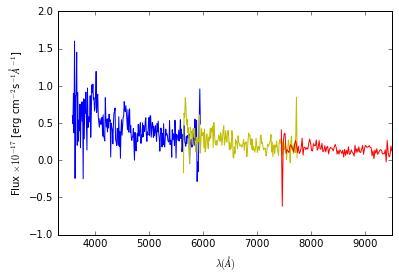

In [7]:
plot_smooth(0,20,23,35)

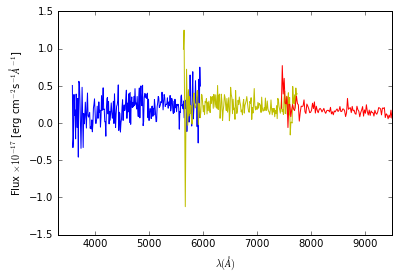

In [8]:
plot_smooth(2,20,23,35)

In [9]:
print hdus[0][4].columns.names

['OBJTYPE', 'TARGETCAT', 'BRICKNAME', 'TARGETID', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'MAG', 'FILTER', 'SPECTROID', 'POSITIONER', 'FIBER', 'LAMBDAREF', 'RA_TARGET', 'DEC_TARGET', 'RA_OBS', 'DEC_OBS', 'X_TARGET', 'Y_TARGET', 'X_FVCOBS', 'Y_FVCOBS', 'Y_FVCERR', 'X_FVCERR', 'NIGHT', 'EXPID']


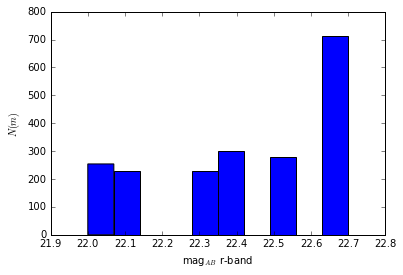

In [10]:
plt.hist(hdus[0][4].data['MAG'][:,2])
plt.xlabel('mag$_{AB}$ r-band')
plt.ylabel('$N(m)$')